In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as smtsa
import random
import re
from collections import defaultdict

In [18]:
with open('solar0.csv', 'r') as f:
    lines = f.readlines()
f.close()
t = []
S = []
del(lines[0])
del(lines[-1])
for line in lines:
    line = re.split(r'\t+', line.strip())
    t.append(line[0])
    S.append(line[1])
t = np.array(t)
S = np.array(S)

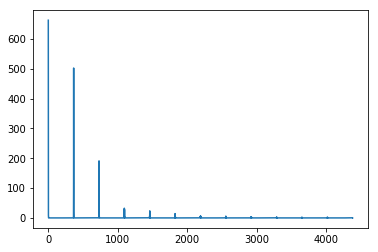

In [19]:
four = np.fft.fft(S)
half = int(len(four)/2)
four = 2*np.absolute(four[:half]/len(four))
plt.plot(four)

In [20]:
four_map = {}
i = 0
for i in range(len(four)):
    if four[i] > 0.5:
        four_map[i] = four[i]

In [21]:
four_map

{0: 662.2381278538812,
 1: 162.9342603740617,
 2: 9.298467812092728,
 362: 1.9477084047363968,
 363: 5.077910378197675,
 364: 94.24437462181909,
 365: 502.19958530561394,
 366: 105.91114973794657,
 367: 23.440325524920606,
 368: 2.2072478971268295,
 728: 5.4886358657802035,
 729: 10.124721102765951,
 730: 191.03894223869057,
 731: 3.2881951491671133,
 732: 22.320895849578015,
 1092: 0.5157652545312714,
 1093: 2.759831325145107,
 1094: 32.55145917383269,
 1095: 0.8792366930035455,
 1096: 28.477203940178118,
 1098: 3.6943318359131623,
 1457: 0.734320382063248,
 1458: 6.628450246394669,
 1459: 2.777596794551332,
 1460: 23.604494750834903,
 1461: 1.4628518199437477,
 1462: 10.859940350012293,
 1464: 0.9292060939835718,
 1822: 0.6759899851668522,
 1823: 1.917313491308155,
 1824: 14.42305367751964,
 1825: 0.625356120488121,
 1826: 11.21285817989966,
 1827: 0.590859849012673,
 1828: 3.758449667439707,
 2187: 0.8616406411041102,
 2188: 5.780371751778197,
 2189: 1.2649986801128181,
 2190: 3.013

In [22]:
R = {}
last = [0,0]
for t1,v in four_map.items():
    if v > last[1]:
        last[0] = t1
        last[1] = v
    else: 
        R[last[0]] = last[1]
        last = [0,0]
R

{0: 662.2381278538812,
 2: 9.298467812092728,
 365: 502.19958530561394,
 367: 23.440325524920606,
 730: 191.03894223869057,
 732: 22.320895849578015,
 1094: 32.55145917383269,
 1096: 28.477203940178118,
 1458: 6.628450246394669,
 1460: 23.604494750834903,
 1462: 10.859940350012293,
 1824: 14.42305367751964,
 1826: 11.21285817989966,
 1828: 3.758449667439707,
 2188: 5.780371751778197,
 2190: 3.013344702131465,
 2192: 6.533258436358943,
 2552: 1.422438483359863,
 2554: 6.015152982855608,
 2558: 3.3430519399683885,
 2918: 4.2045776459969755,
 2922: 3.469648342963194,
 3282: 1.787738021136618,
 3288: 2.7468313611943755,
 3648: 2.4738846056922403,
 3652: 1.1484213620785568,
 3654: 0.816982100155597,
 4012: 1.9821522551714308,
 4018: 2.258619114965413}

In [23]:
Y = {}
last = [0,0]
r_list = list(R.keys())
Y[r_list[0]] = R[r_list[0]]
for t1 in reversed(r_list):
    if R[t1] > last[1]:
        last[0] = t1
        last[1] = R[t1]
    else: 
        Y[last[0]] = last[1]
        last = [0,0]
Y

{0: 662.2381278538812,
 4018: 2.258619114965413,
 3288: 2.7468313611943755,
 2918: 4.2045776459969755,
 2554: 6.015152982855608,
 2192: 6.533258436358943,
 2188: 5.780371751778197,
 1824: 14.42305367751964,
 1460: 23.604494750834903,
 1094: 32.55145917383269,
 730: 191.03894223869057,
 365: 502.19958530561394}

In [38]:
sig = np.array([])
for t1,v in Y.items():
    print(t1, v)
    sig = sig + v*np.sin(2*np.pi*t1*t/len(t))

0 662.2381278538812


TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

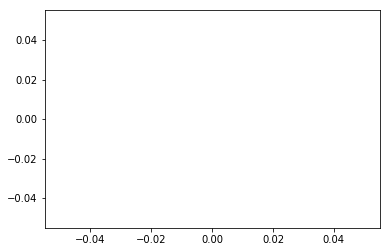

In [34]:
plt.plot(sig)